In [1]:
setwd("~/Documents/DE/Shed/")
require(ggplot2)
require(nlme)
require(tidyr)
require(glmm)
require(dplyr)

Loading required package: ggplot2
Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”Loading required package: nlme
Loading required package: tidyr
Warning message:
“package ‘tidyr’ was built under R version 3.6.2”Loading required package: glmm
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘glmm’”Loading required package: dplyr
Warning message:
“package ‘dplyr’ was built under R version 3.6.2”
Attaching package: ‘dplyr’

The following object is masked from ‘package:nlme’:

    collapse

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
time=read.csv("MN_Cellsfound.csv")
oystertime=read.csv("MN_Oysters.csv")
oystertime_s=oystertime[c(2,7)]

In [7]:
time_oy=merge(time, oystertime_s, by="Replicate")

In [8]:
light= data.frame("Time"=c("6", "12", "18", "24"), "Watts" = c(0,217265/60, 300291/60, 42664/60))

In [11]:
time_oyster=merge(time_oy, light, by="Time")

In [12]:
#keep oysters that released at least one cell
list_mean=aggregate(time_oyster$number, by=list(time_oyster$Replicate),
  FUN=sum, na.rm=TRUE)
keep=list_mean[!list_mean$x==0,]
colnames(keep)=c("Replicate","total")

In [13]:
time_oyster$number=as.numeric(as.character(time_oyster$number))
time_oyster$Replicate=as.factor(as.character(time_oyster$Replicate))
time_oyster$Time=factor(as.character(time_oyster$Time), levels=c(6, 12, 18, 24), order=FALSE)

infected_time=merge(time_oyster, keep, by="Replicate")
infected_time$percent=infected_time$number/infected_time$total*100
infected_time$lognum=log10(infected_time$number+1)

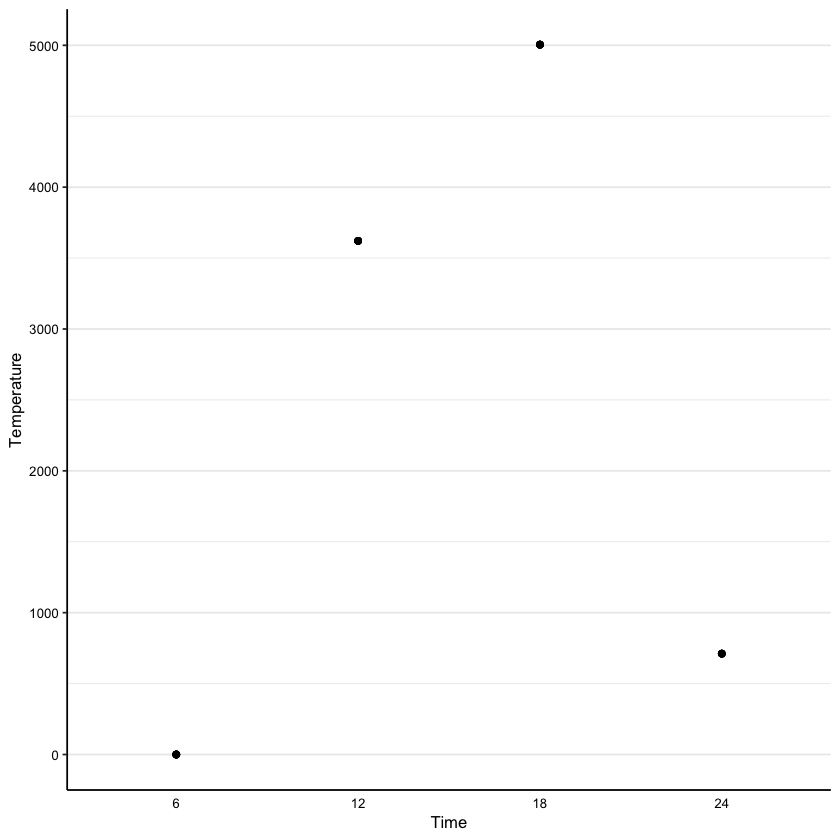

In [14]:
ggplot(na.omit(infected_time), aes(x = Time, y = Watts)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point()+
geom_line()+
#facet_grid(. ~ Salinity)+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=10))+
ylab("Temperature")

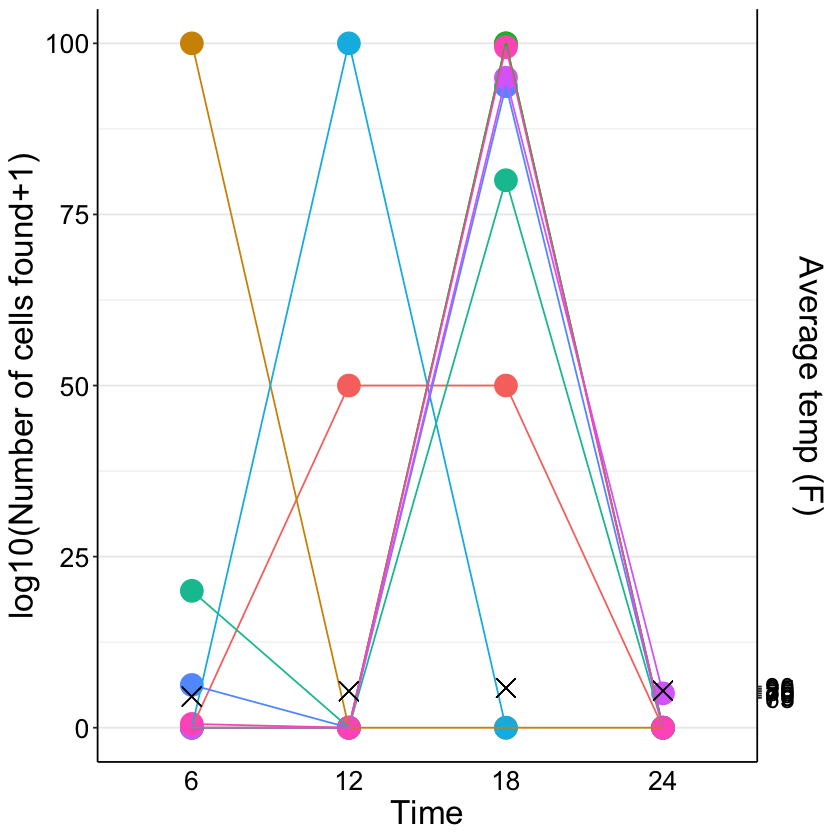

In [15]:
##try gregs idea of graphing percent cells released?
ggplot(na.omit(infected_time), aes(x = Time, y = percent, col=Replicate, group=Replicate)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
geom_line()+
#facet_grid(. ~ Salinity)+
geom_point(aes(x = Time, y = Temp/15), col="black", pch=4, size=5)+
   scale_y_continuous(sec.axis = sec_axis(~.*15, name = "Average temp (F)", breaks=c(65, 70, 75, 80, 85, 90)))+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10(Number of cells found+1)")

WEll, that looks like crap nvm.

ERROR while rich displaying an object: Error in jitter(Time): 'x' must be numeric

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.out

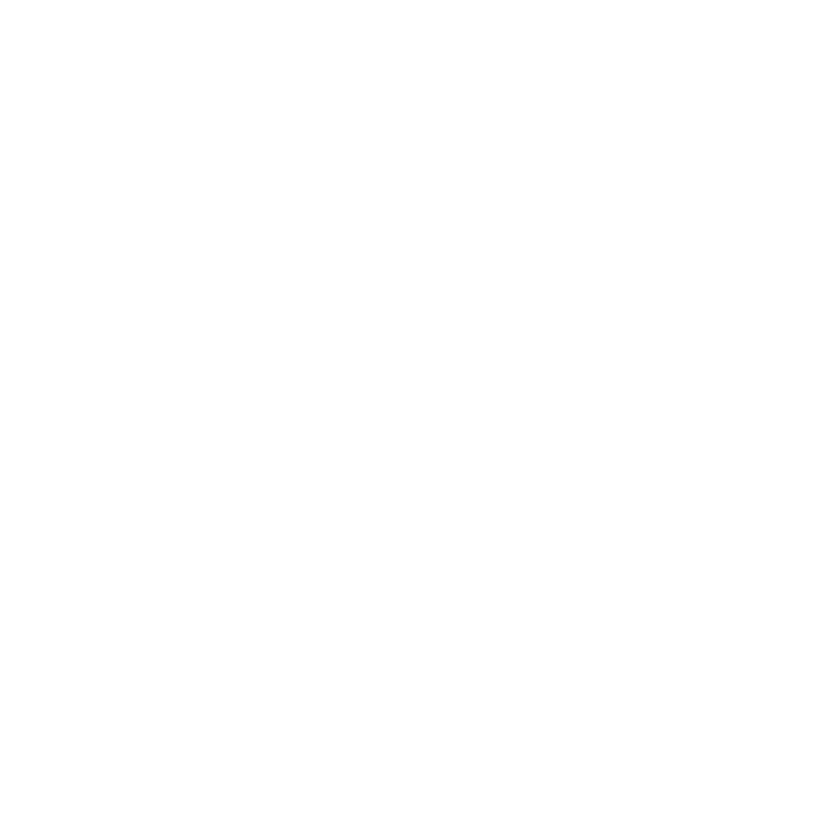

In [27]:
ggplot(na.omit(infected_time), aes(x = jitter(Time), y = lognum, col=Replicate, group=Replicate)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6)+
geom_line()+
#facet_grid(. ~ Salinity)+
geom_point(aes(x = Time, y = Temp/15), col="black", pch=17, size=5)+
   scale_y_continuous(sec.axis = sec_axis(~.*15, name = "Average temp (F)", breaks=c(65, 70, 75, 80, 85, 90)))+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10(Number of cells found+1)")

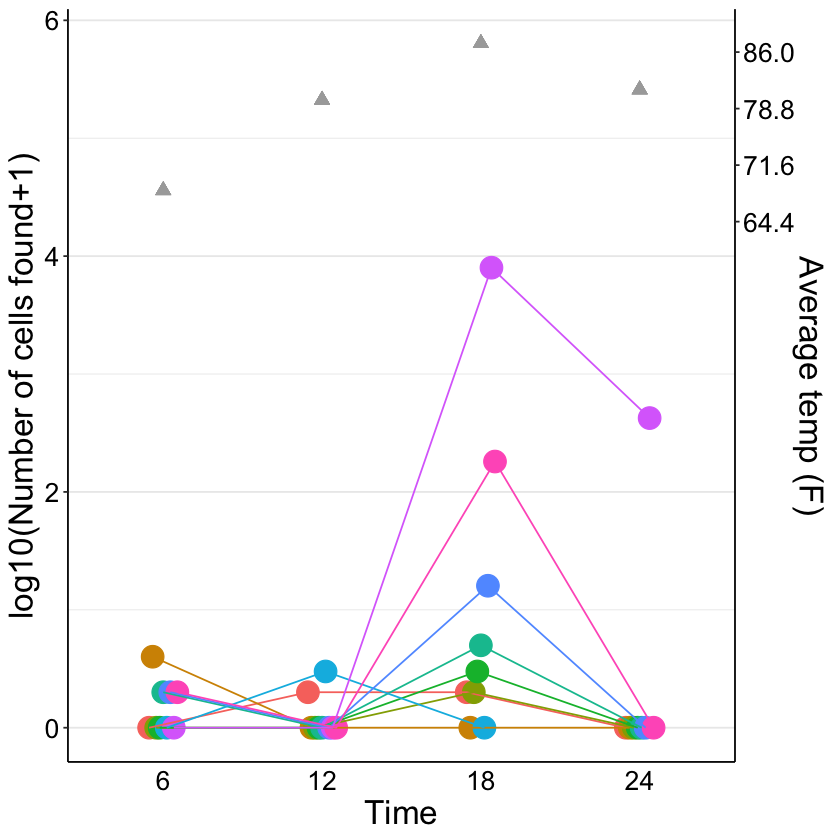

In [49]:
ggplot(na.omit(infected_time), aes(x = Time, y = lognum, col=Replicate, group=Replicate)) +
#scale_color_manual(values=c("darkred", "goldenrod"))+
        geom_point(size=6, position=position_dodge(width=0.2))+
geom_line(position=position_dodge(width=0.2))+
#facet_grid(. ~ Salinity)+
geom_point(aes(x = Time, y = Temp/15), col="darkgray", pch=17, size=3)+
   scale_y_continuous(sec.axis = sec_axis(~.*15, name = "Average temp (F)", breaks=c(64.4, 71.6, 78.8, 86, 93.2)))+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10(Number of cells found+1)")

In [50]:
ggsave(filename="~/Documents/DE/Shed/Manuscript/Cellsreleased_time_temp.pdf", width=8, height=6)

In [54]:
length(unique(infected_time$Replicate))

[1] 9

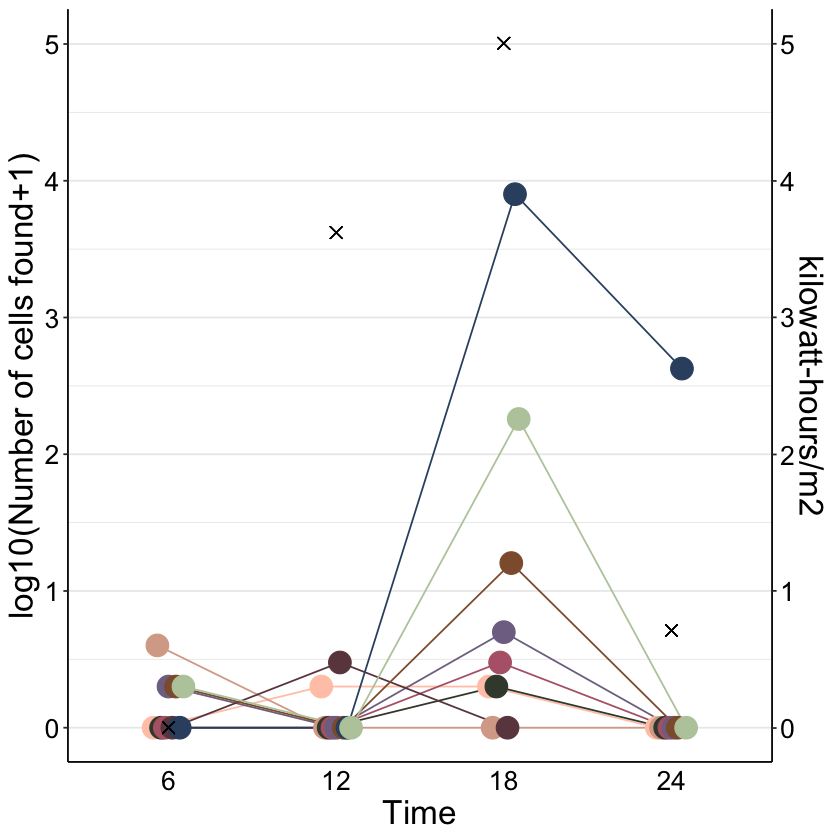

In [68]:
ggplot(na.omit(infected_time), aes(x = Time, y = lognum, col=Replicate, group=Replicate)) +
scale_color_manual(values=c("#FFC9B5", "#D8AA96",  "#3F4739","#B56576",  "#807192", "#6C464E" , "#8F5C38",  "#355070", "#BACBA9"))+
geom_line(position=position_dodge(width=0.2))+
geom_point(size=6, position=position_dodge(width=0.2))+

#facet_grid(. ~ Salinity)+
geom_point(aes(x = Time, y = Watts/1000), col="black", pch=4, size=3)+
   scale_y_continuous(sec.axis = sec_axis(~., name = "kilowatt-hours/m2", breaks=c(0, 1, 2, 3, 4, 5)))+
theme_bw()+
 theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10(Number of cells found+1)")

In [70]:
ggsave(filename="~/Documents/DE/Shed/Manuscript/Cellsreleased_time_light.pdf", width=8, height=6)

In [16]:
time_oyster$number=as.integer(time_oyster$number)

In [17]:
temp=glmm(number~Temp, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
time=glmm(number~Time, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
light=glmm(number~Watts, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)


In [18]:
ancovasal=lm(data=time_oyster[!is.na(time_oyster$number),], number~Salinity+RFTM.Score+Time)
summary(ancovasal)


Call:
lm(formula = number ~ Salinity + RFTM.Score + Time, data = time_oyster[!is.na(time_oyster$number), 
    ])

Residuals:
   Min     1Q Median     3Q    Max 
-483.9 -180.4  -54.8  138.6 7354.9 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)  
(Intercept)          -150.13330  144.04863  -1.042   0.2992  
SalinityIntermediate    3.06672  141.65937   0.022   0.9828  
SalinityLow           193.40374  141.22164   1.370   0.1732  
RFTM.Score             68.61018   31.06131   2.209   0.0289 *
Time12                 -0.08333  158.24423  -0.001   0.9996  
Time18                234.75058  159.39092   1.473   0.1432  
Time24                 11.48853  166.30111   0.069   0.9450  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 671.4 on 130 degrees of freedom
Multiple R-squared:  0.0741,	Adjusted R-squared:  0.03137 
F-statistic: 1.734 on 6 and 130 DF,  p-value: 0.118


In [19]:
summary(time)


Call:
glmm(fixed = number ~ Time, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -6.9354     0.4083  -16.98   <2e-16 ***
Time12       -0.6931     0.7071   -0.98    0.327    
Time18        7.2177     0.4084   17.67   <2e-16 ***
Time24        4.2540     0.4111   10.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.098      0.967   4.238   1.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [20]:
summary(temp)


Call:
glmm(fixed = number ~ Temp, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -49.568328   0.688109  -72.04   <2e-16 ***
Temp          0.572465   0.007929   72.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.323      1.027   4.209   1.28e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [21]:
summary(light)


Call:
glmm(fixed = number ~ Watts, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.375e+00  9.354e-02  -68.15   <2e-16 ***
Watts        1.305e-03  1.927e-05   67.70   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate    4.221      0.997   4.233   1.15e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [22]:
time_oyster$Time=relevel(time_oyster$Time, ref = "12")
time2=glmm(number~Time, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
summary(time2)


Call:
glmm(fixed = number ~ Time, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -7.6496     0.5774 -13.249   <2e-16 ***
Time6         0.6931     0.7071   0.980    0.327    
Time18        7.9110     0.5775  13.700   <2e-16 ***
Time24        4.9472     0.5794   8.539   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate   4.0578     0.9576   4.237   1.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [23]:
time_oyster$Time=relevel(time_oyster$Time, ref = "18")
time3=glmm(number~Time, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
summary(time3)


Call:
glmm(fixed = number ~ Time, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.28195    0.01306   21.59   <2e-16 ***
Time12      -7.91084    0.57746  -13.70   <2e-16 ***
Time6       -7.21769    0.40840  -17.67   <2e-16 ***
Time24      -2.96378    0.04992  -59.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate   4.0632     0.9609   4.228   1.18e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [24]:
time_oyster$Time=relevel(time_oyster$Time, ref = "24")
time4=glmm(number~Time, data=time_oyster[!is.na(time_oyster$number),], random=~0+Replicate, varcomps.names="Replicate", poisson.glmm, m=100)
summary(time4)


Call:
glmm(fixed = number ~ Time, random = ~0 + Replicate, varcomps.names = "Replicate", 
    data = time_oyster[!is.na(time_oyster$number), ], family.glmm = poisson.glmm, 
    m = 100)


Link is: "log"

Fixed Effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.70294    0.04889 -55.283   <2e-16 ***
Time18       2.96376    0.04992  59.371   <2e-16 ***
Time12      -4.94720    0.57940  -8.539   <2e-16 ***
Time6       -4.25406    0.41114 -10.347   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Variance Components for Random Effects (P-values are one-tailed):
          Estimate Std. Error z value Pr(>|z|)/2    
Replicate   4.0580     0.9575   4.238   1.13e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
